In [20]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
#Load dataset
raw_data = pd.read_csv("credit_risk_dataset.csv")

In [22]:
'''
person_age: Age of the individual applying for the loan.
person_income: Annual income of the individual.
person_home_ownership: Type of home ownership of the individual.
rent: The individual is currently renting a property.
mortgage: The individual has a mortgage on the property they own.
own: The individual owns their home outright.
other: Other categories of home ownership that may be specific to the dataset.
person_emp_length: Employment length of the individual in years.
loan_intent: The intent behind the loan application.
loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.
A: The borrower has a high creditworthiness, indicating low risk.
B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
C: The borrower's creditworthiness is moderate.
D: The borrower is considered to have higher risk compared to previous grades.
E: The borrower's creditworthiness is lower, indicating a higher risk.
F: The borrower poses a significant credit risk.
G: The borrower's creditworthiness is the lowest, signifying the highest risk.
loan_amnt: The loan amount requested by the individual.
loan_int_rate: The interest rate associated with the loan.
loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
loan_percent_income: The percentage of income represented by the loan amount.
cb_person_default_on_file: Historical default of the individual as per credit bureau records.
Y: The individual has a history of defaults on their credit file.
N: The individual does not have any history of defaults.
cb_preson_cred_hist_length: The length of credit history for the individual.
'''

"\nperson_age: Age of the individual applying for the loan.\nperson_income: Annual income of the individual.\nperson_home_ownership: Type of home ownership of the individual.\nrent: The individual is currently renting a property.\nmortgage: The individual has a mortgage on the property they own.\nown: The individual owns their home outright.\nother: Other categories of home ownership that may be specific to the dataset.\nperson_emp_length: Employment length of the individual in years.\nloan_intent: The intent behind the loan application.\nloan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.\nA: The borrower has a high creditworthiness, indicating low risk.\nB: The borrower is relatively low-risk, but not as creditworthy as Grade A.\nC: The borrower's creditworthiness is moderate.\nD: The borrower is considered to have higher risk compared to previous grades.\nE: The borrower's creditworthiness is lower, indicating a higher risk.\nF: The borrower pos

In [23]:
raw_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [24]:
raw_data.shape

(32581, 12)

In [25]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [26]:
raw_data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [27]:
raw_data.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [28]:
raw_data.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [29]:
raw_data.duplicated().sum()

np.int64(165)

In [30]:
# MAX AND MIN AGE
max_age = raw_data['person_age'].max()
min_age = raw_data['person_age'].min()
print(f"Maximum Age: {max_age}")
print(f"Minimum Age: {min_age}")
# Optimized age grouping using pd.cut
bins_age = [0, 18, 26, 36, 46, 56, 66, 86, 106, 126, 146]
age_counts = pd.cut(raw_data['person_age'], bins=bins_age).value_counts().sort_index()
print(age_counts)

Maximum Age: 144
Minimum Age: 20
person_age
(0, 18]           0
(18, 26]      17829
(26, 36]      11834
(36, 46]       2360
(46, 56]        434
(56, 66]         98
(66, 86]         20
(86, 106]         1
(106, 126]        2
(126, 146]        3
Name: count, dtype: int64


In [31]:
#max and min income
max_ = raw_data['person_income'].max()
min_ = raw_data['person_income'].min()

print(f"maximum Income {max_}")
print(f"minimum Income {min_}")

bins_income = [0, 25000, 50000, 75000, 100000,float('inf')]
income_counts = pd.cut(raw_data['person_income'], bins=bins_income).value_counts().sort_index()
print(income_counts)        

maximum Income 6000000
minimum Income 4000
person_income
(0.0, 25000.0]          2469
(25000.0, 50000.0]     11613
(50000.0, 75000.0]      9622
(75000.0, 100000.0]     4670
(100000.0, inf]         4207
Name: count, dtype: int64


In [32]:
#min and max loan amount
max_loan_amount = raw_data['loan_amnt'].max()
min_loan_amount = raw_data['loan_amnt'].min()

print(f"maximum Loan Amount {max_loan_amount}")
print(f"minimum Loan Amount {min_loan_amount}")

# people with an income between x and y
bins_loan_amount = [0, 5000, 10000, 15000, float('inf')]
loan_amount_group = pd.cut(raw_data['loan_amnt'], bins=bins_loan_amount).value_counts().sort_index()
print(loan_amount_group)
        
#loan_amount_group([0, 5000, 10000, 15000, float('inf')])


maximum Loan Amount 35000
minimum Loan Amount 500
loan_amnt
(0.0, 5000.0]          9489
(5000.0, 10000.0]     12040
(10000.0, 15000.0]     6123
(15000.0, inf]         4929
Name: count, dtype: int64


In [33]:
raw_data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

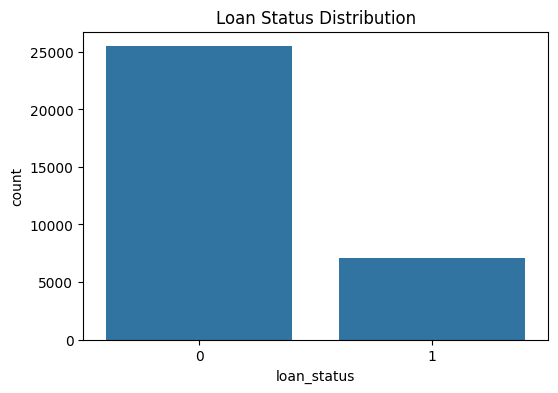

loan_status
0    78.183604
1    21.816396
Name: proportion, dtype: float64


In [34]:
# Loan Status Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=raw_data)
plt.title('Loan Status Distribution')
plt.show()

# Print percentage
print(raw_data['loan_status'].value_counts(normalize=True) * 100)

In [35]:
num_cols = raw_data.select_dtypes(include=["int64", "float64"]).columns 
print(num_cols)


Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')


In [36]:
cat_cols = [ col for col in raw_data.columns.values if col not in num_cols]
print(cat_cols)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


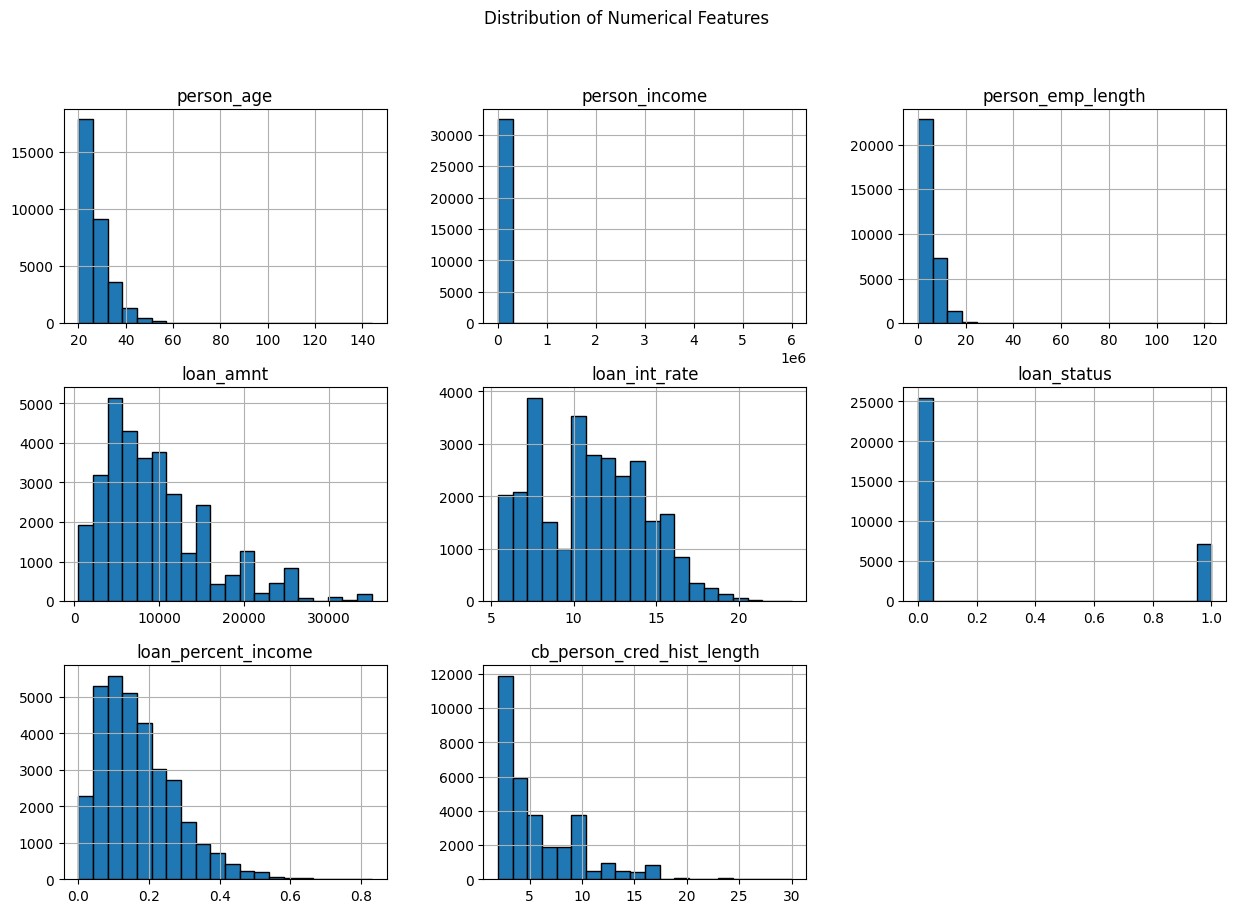

In [37]:
# Histograms for all numerical columns
raw_data[num_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

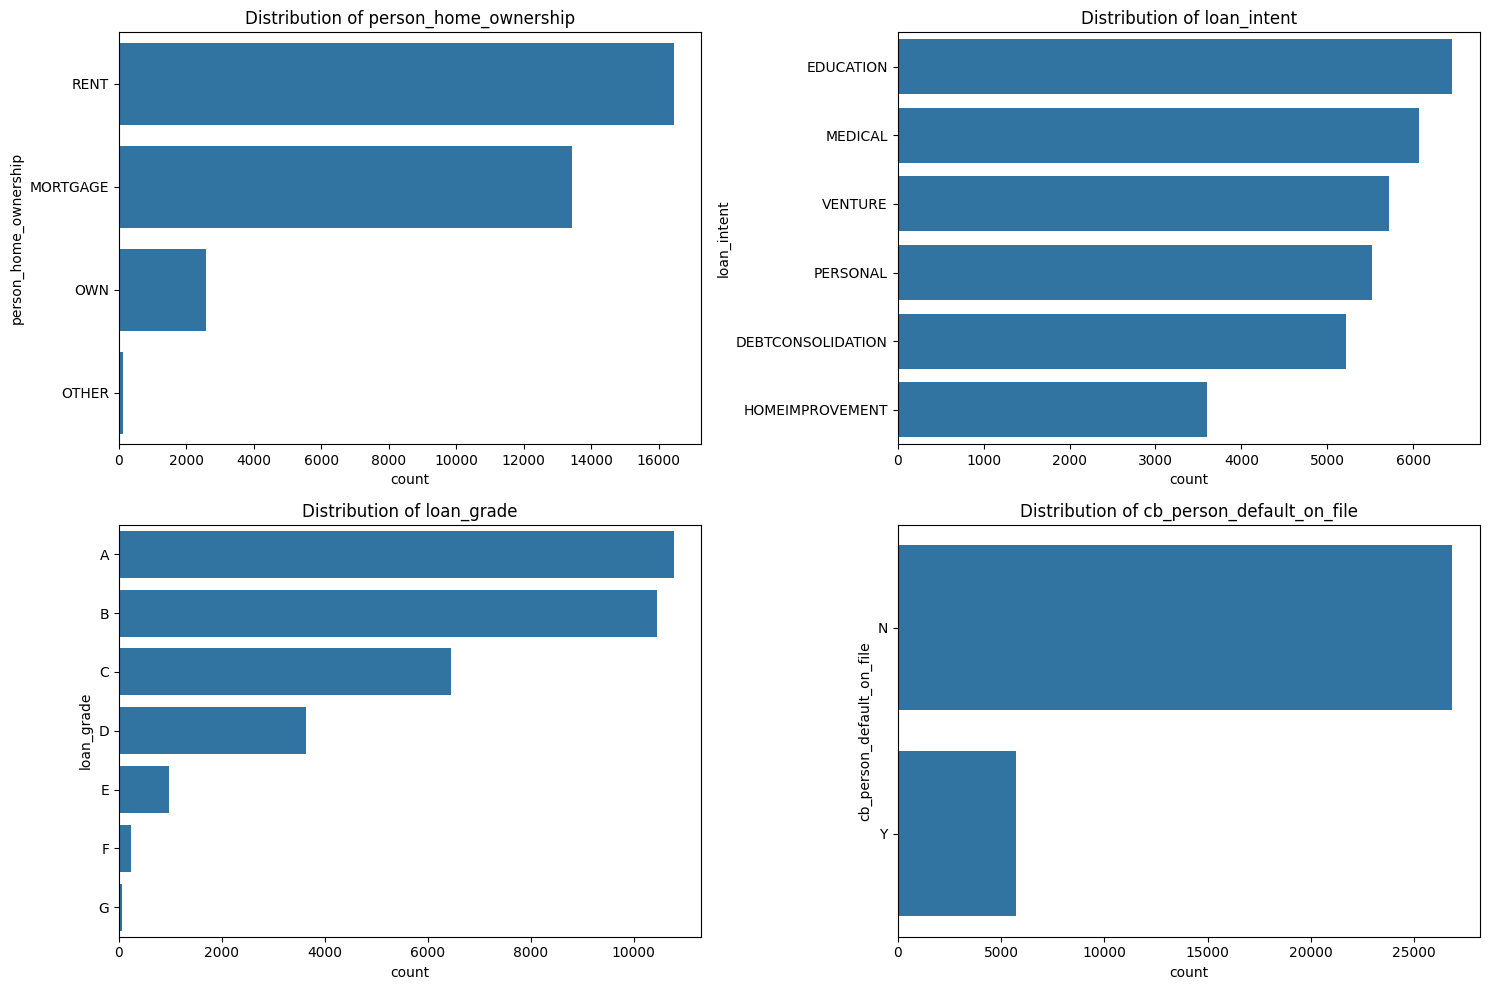

In [38]:
# Count plots for categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(y=col, data=raw_data, order=raw_data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

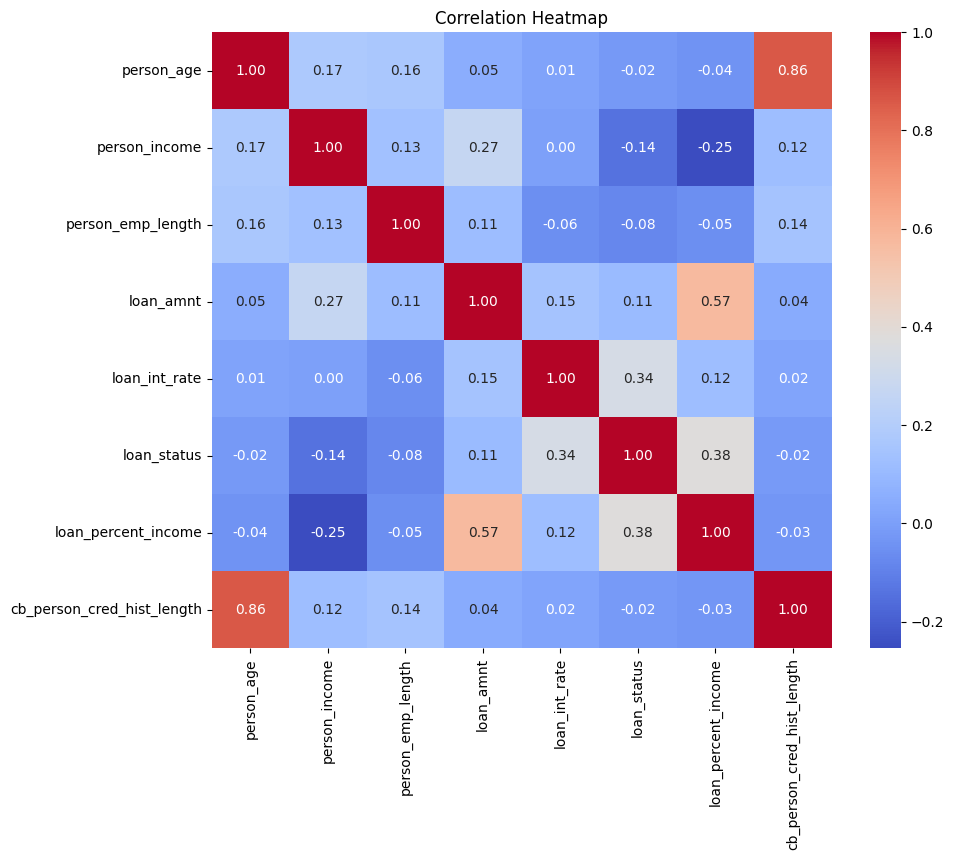

In [39]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(raw_data[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

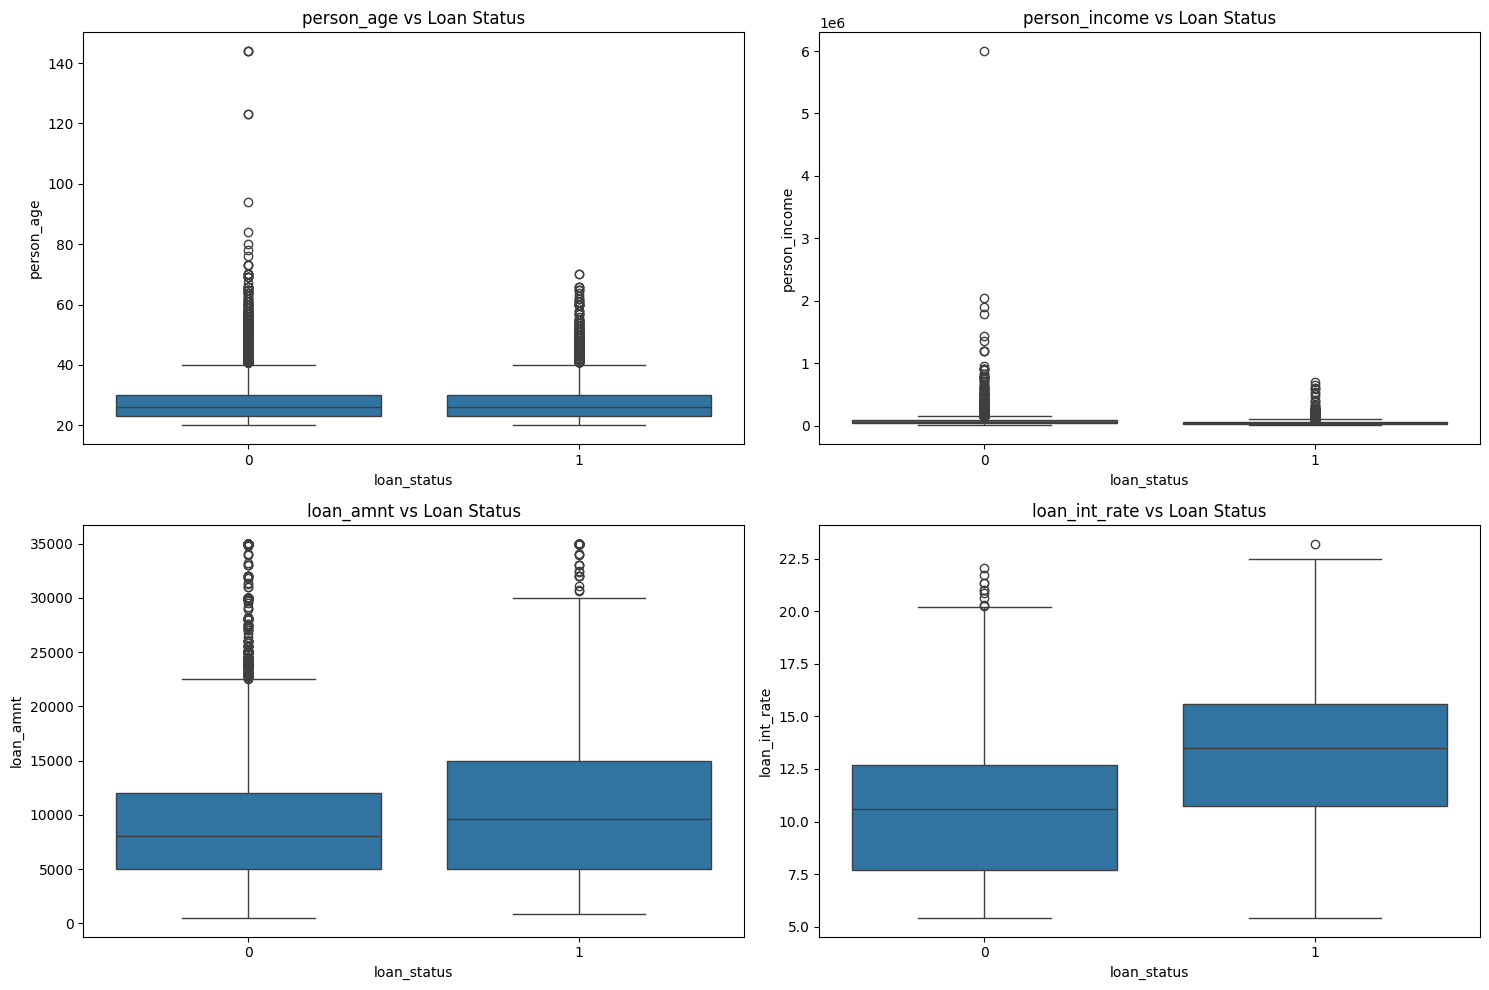

In [40]:
# Boxplots to see relationship with Target
plt.figure(figsize=(15, 10))
for i, col in enumerate(['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='loan_status', y=col, data=raw_data)
    plt.title(f'{col} vs Loan Status')
plt.tight_layout()
plt.show()

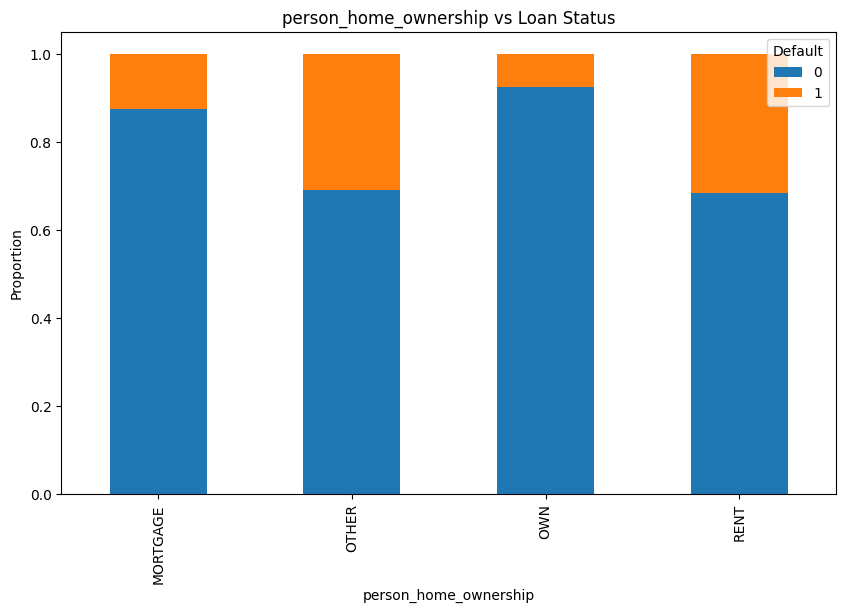

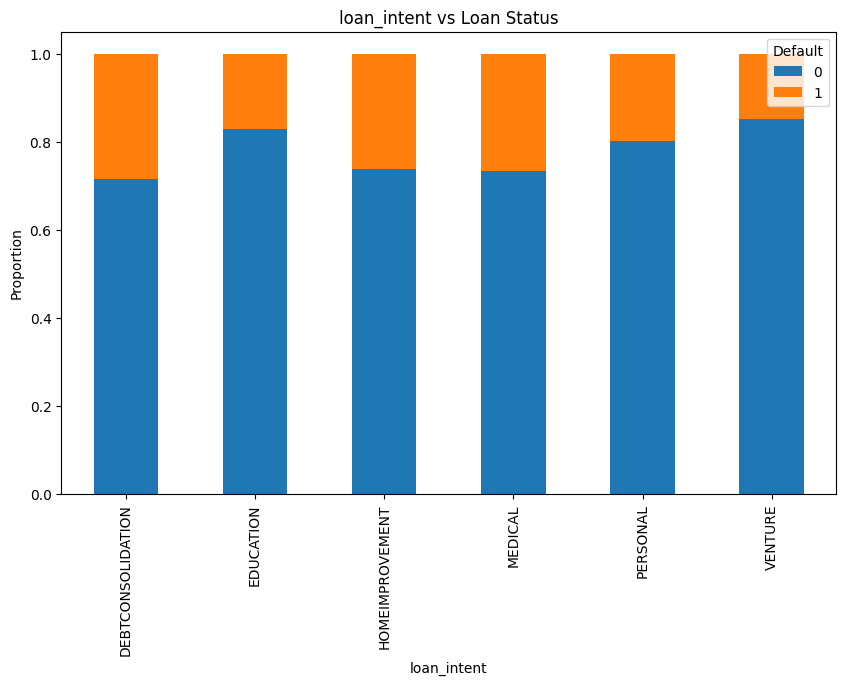

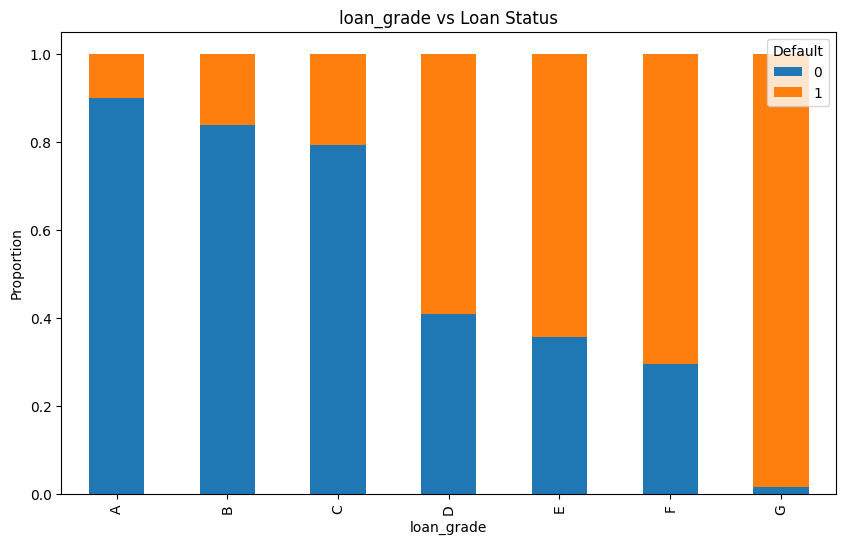

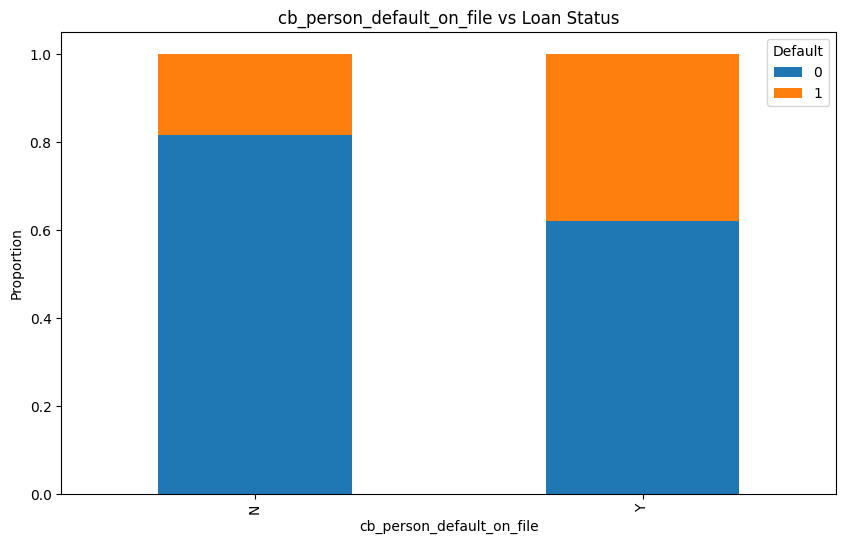

In [41]:
# Function to plot stacked bar charts
def plot_cat_vs_target(data, col, target='loan_status'):
    ct = pd.crosstab(data[col], data[target], normalize='index')
    ct.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'{col} vs Loan Status')
    plt.ylabel('Proportion')
    plt.legend(title='Default', loc='upper right')
    plt.show()

for col in cat_cols:
    plot_cat_vs_target(raw_data, col)

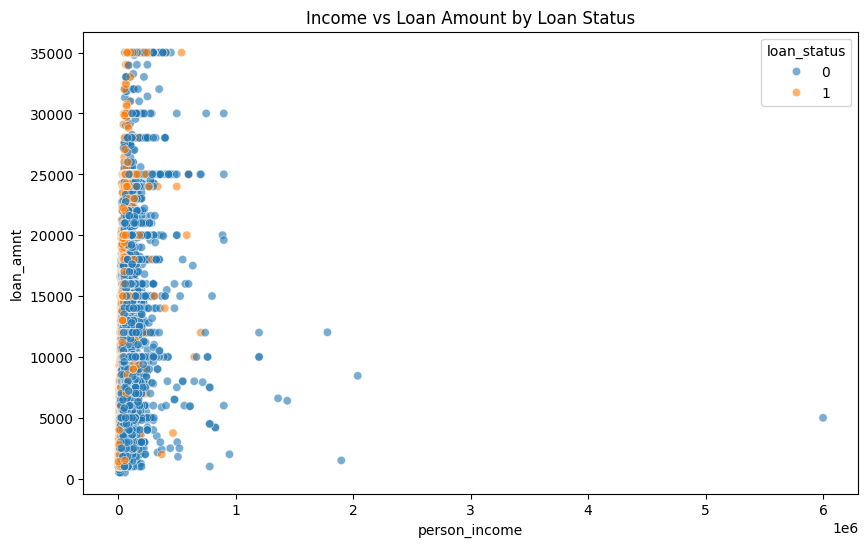

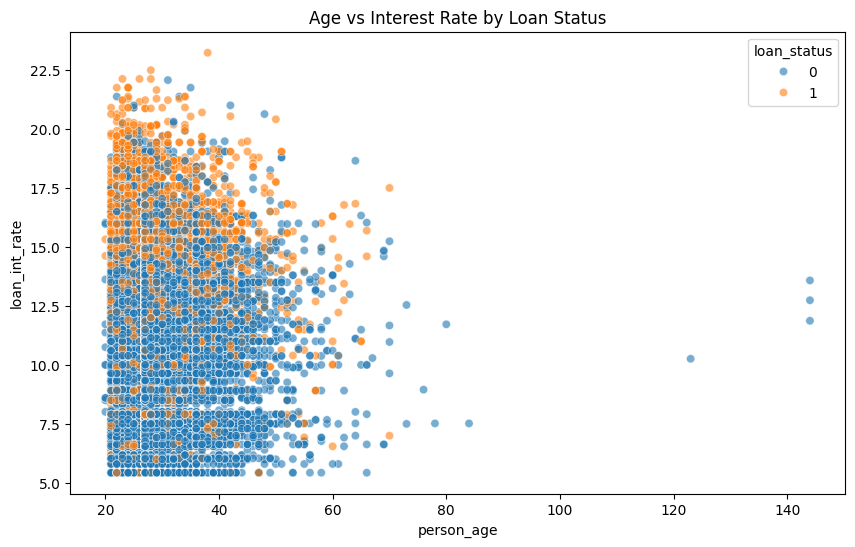

In [42]:
# Income vs Loan Amount with Status Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=raw_data, alpha=0.6)
plt.title('Income vs Loan Amount by Loan Status')
plt.show()

# Age vs Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='person_age', y='loan_int_rate', hue='loan_status', data=raw_data, alpha=0.6)
plt.title('Age vs Interest Rate by Loan Status')
plt.show()

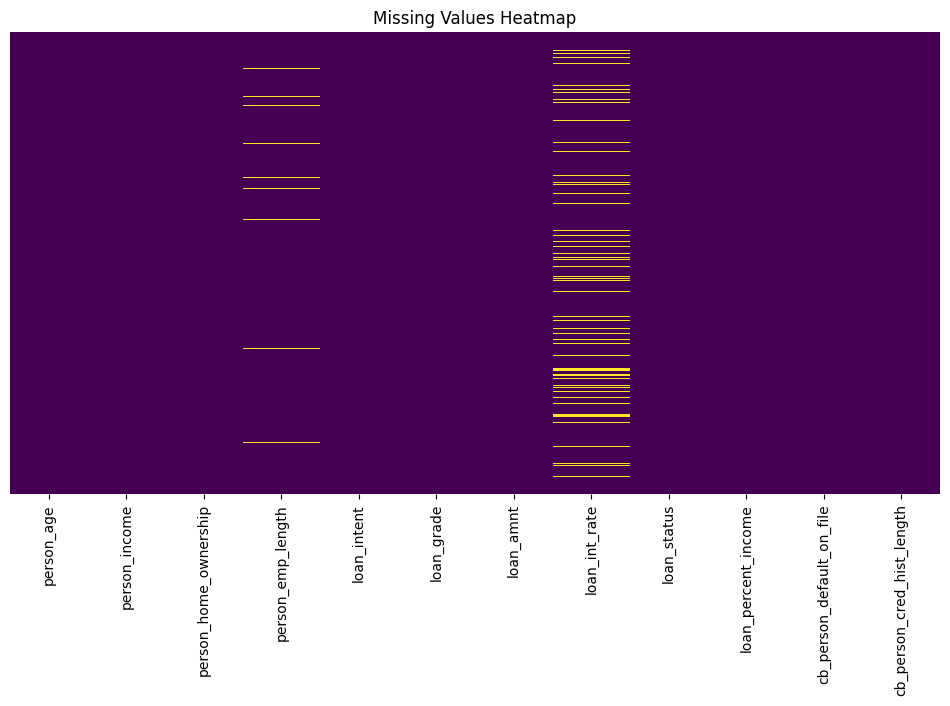

In [43]:
# Heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(raw_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [44]:
# Average Interest Rate by Loan Grade and Status
pivot_table = raw_data.pivot_table(index='loan_grade', columns='loan_status', values='loan_int_rate', aggfunc='mean')
print("Average Interest Rate by Grade and Status:")
display(pivot_table)

Average Interest Rate by Grade and Status:


loan_status,0,1
loan_grade,,
A,7.303224,7.547595
B,10.987726,11.035864
C,13.464246,13.460852
D,15.391206,15.341172
E,16.992935,17.018424
F,18.793750,18.530400
G,19.160000,20.270345


In [45]:
print(raw_data.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [46]:
## as there are few missing values in the dataset, we will use the median of the column to fill the missing values

In [47]:
# 1. Fill Employment Length with Median
raw_data['person_emp_length'].fillna(raw_data['person_emp_length'].median(), inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_24660\2019188551.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['person_emp_length'].fillna(raw_data['person_emp_length'].median(), inplace=True)


In [48]:
# 2. Fill Interest Rate with Median based on Loan Grade (More accurate)
# We group by 'loan_grade' and then fill missing values in 'loan_int_rate' with the median of that group
raw_data['loan_int_rate'] = raw_data.groupby('loan_grade')['loan_int_rate'].transform(
    lambda x: x.fillna(x.median())
)

In [49]:
# Verify no nulls remain
print(raw_data.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [50]:
raw_data.duplicated().sum()

np.int64(165)

In [51]:
# --- Outlier Handling ---

In [52]:
# 1. Handle Age Outliers
# Removing records with age > 100 as they are likely data entry errors (max was 144)
raw_data = raw_data[raw_data['person_age'] < 100]

In [53]:
# 2. Handle Employment Length Outliers
# Removing records with employment length > 100 years (max was 123)
raw_data = raw_data[raw_data['person_emp_length'] < 100]

In [54]:
# 3. Handle Income Outliers
# Removing extremely high incomes (> 99th percentile) to reduce skew
# This preserves most of the high-income earners but drops the extreme outliers (like 6 million)
income_cap = raw_data['person_income'].quantile(0.99)
raw_data = raw_data[raw_data['person_income'] <= income_cap]

In [55]:
print("Data shape after outlier handling:", raw_data.shape)
print(f"Max Age: {raw_data['person_age'].max()}")
print(f"Max Emp Length: {raw_data['person_emp_length'].max()}")
print(f"Max Income: {raw_data['person_income'].max()}")

Data shape after outlier handling: (32250, 12)
Max Age: 94
Max Emp Length: 41.0
Max Income: 225000


In [56]:
###feature Engineering

def engineer_risk_features(df):
    # Copy to avoid SettingWithCopyWarning
    df_eng = df.copy()
    
    # 1. Loan-to-Income (The 'Strains' Factor)
    df_eng['loan_to_income_ratio'] = df_eng['loan_amnt'] / df_eng['person_income']
    
    # 2. Monthly Debt Burden (Approximate)
    # Assume interest is annual; divide income by 12 for monthly
    df_eng['monthly_interest_burden'] = (df_eng['loan_amnt'] * (df_eng['loan_int_rate'] / 100)) / (df_eng['person_income'] / 12)
    
    # 3. Employment Stability Score
    # Adding 1 to denominator to avoid division by zero for newborns (if any!)
    df_eng['emp_stability_ratio'] = df_eng['person_emp_length'] / (df_eng['person_age'] - 18).replace(0, 1)
    
    # 4. Credit History Maturity
    df_eng['cred_hist_to_age_ratio'] = df_eng['cb_person_cred_hist_length'] / df_eng['person_age']
    
    return df_eng

raw_data = engineer_risk_features(raw_data)

In [57]:
def create_bins(df):
    # Age Bins: Young, Prime, Senior (Credit risk often follows a U-shape here)
    df['age_group'] = pd.cut(df['person_age'], 
                             bins=[0, 25, 50, 100], 
                             labels=['Young', 'Prime', 'Senior'])
    
    # Income Bins: Using quantiles ensures even distribution
    df['income_group'] = pd.qcut(df['person_income'], q=4, labels=['Low', 'Mid', 'High', 'Very_High'])
    
    return df

raw_data = create_bins(raw_data)

In [58]:
num_cols = raw_data.select_dtypes(include=["int64", "float64"]).columns 
print(num_cols)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'loan_to_income_ratio',
       'monthly_interest_burden', 'emp_stability_ratio',
       'cred_hist_to_age_ratio'],
      dtype='object')


In [59]:
cat_cols = [ col for col in raw_data.columns.values if col not in num_cols]
print(cat_cols)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'age_group', 'income_group']


In [60]:
experiment_data = pd.get_dummies(raw_data, columns=cat_cols, drop_first=True)

print(f"New shape after One-Hot Encoding: {experiment_data.shape}")

New shape after One-Hot Encoding: (32250, 32)


In [65]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [62]:
# Preprocessing & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix)

In [63]:
# 1. Define X (features) and y (target)
X = experiment_data.drop(columns=['loan_status'])
y = experiment_data['loan_status']

# 2. Stratified Split (80/20)
# 'stratify=y' ensures both sets have the same % of defaulters
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Scaling (Required for Logistic Regression and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Default rate in training: {y_train.mean():.2%}")

Training set shape: (25800, 31)
Default rate in training: 21.91%


In [66]:
# Define the models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier()
}

results_list = []

for name, model in models.items():
    # Use scaled data for LR and KNN, raw for tree-based models
    X_tr = X_train_scaled if name in ["Logistic Regression", "KNN"] else X_train
    X_te = X_test_scaled if name in ["Logistic Regression", "KNN"] else X_test
    
    # Fit & Predict
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    y_proba = model.predict_proba(X_te)[:, 1] # Probability for ROC-AUC
    
    # Calculate Metrics
    results_list.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

# Convert to DataFrame for comparison
comparison_df = pd.DataFrame(results_list).sort_values(by="F1-Score", ascending=False)
display(comparison_df)

c:\Users\adity\Projects\aiml\mljorney\CreditRiskAnalysis\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:33:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
4,XGBoost,0.937209,0.959854,0.744515,0.838581,0.949885
2,Random Forest,0.932403,0.950230,0.729653,0.825460,0.931576
3,Gradient Boosting,0.921705,0.918048,0.705591,0.797919,0.925976
1,Decision Tree,0.887907,0.736301,0.760793,0.748347,0.842179
5,KNN,0.889767,0.832386,0.622081,0.712029,0.866702
0,Logistic Regression,0.876124,0.789077,0.593064,0.677172,0.883571


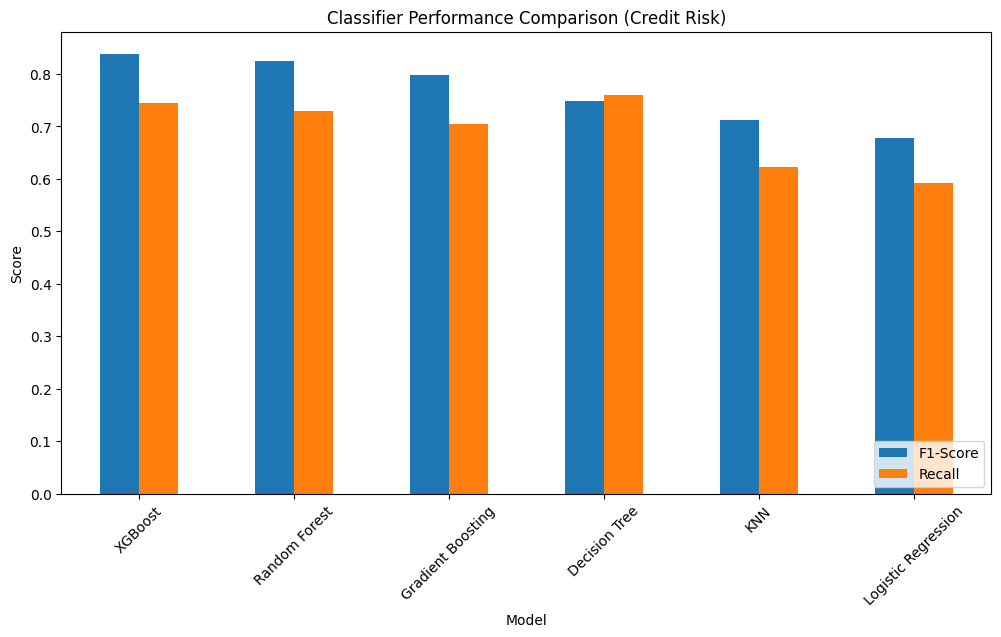

In [67]:
# Plotting the F1-Score and Recall (The two most important for Credit Risk)
comparison_df.set_index("Model")[["F1-Score", "Recall"]].plot(kind='bar', figsize=(12, 6))
plt.title("Classifier Performance Comparison (Credit Risk)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

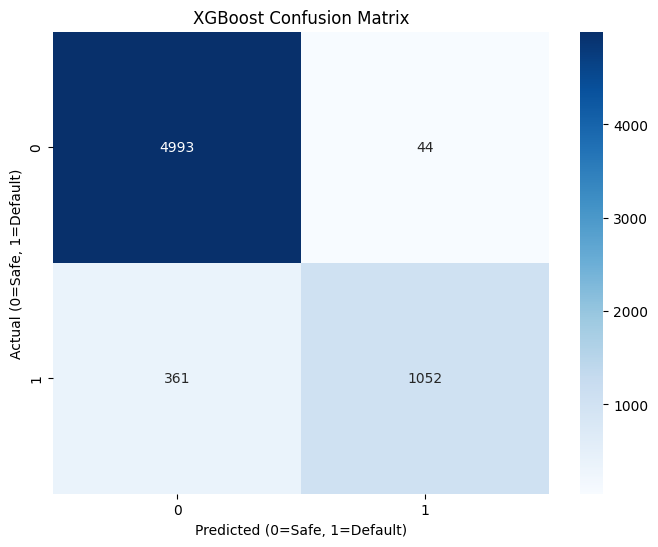

In [68]:
# Assuming 'model' is your fitted XGBoost
best_model = models["XGBoost"]
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted (0=Safe, 1=Default)')
plt.ylabel('Actual (0=Safe, 1=Default)')
plt.title('XGBoost Confusion Matrix')
plt.show()

In [69]:
print(cm)

[[4993   44]
 [ 361 1052]]


In [ ]:
'''
XGBoost performs well, but false negative numbers are concerning, this can be handled wih hyperparameter tuning.
'''